In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
data.drop(['Name'], axis=1, inplace=True)

In [4]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
data.dropna()
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
sc = StandardScaler()
data[['Fare', 'Age']] = sc.fit_transform(data[['Fare', 'Age']])
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Survived'], axis=1), data['Survived'])

model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, matthews_corrcoef

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matthew = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"accuracy = {accuracy} \nf1score = {f1} \nmatthews = {matthew} \nrecall = {recall}")

accuracy = 0.7162162162162162 
f1score = 0.64 
matthews = 0.40730394029887756 
recall = 0.6666666666666666


<AxesSubplot: >

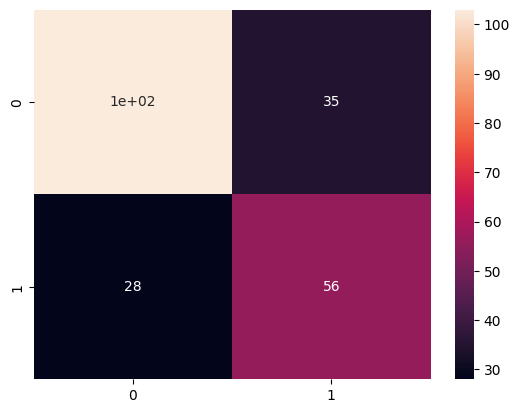

In [9]:
confusion = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(confusion, annot=True)

<AxesSubplot: >

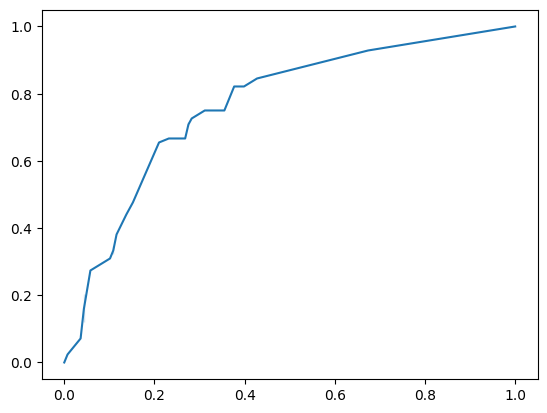

In [12]:
from sklearn.metrics import roc_curve
prob = model.predict_proba(x_test)
prob = prob[:,1]
fpr, tpr, _ = roc_curve(y_test, prob)
sns.lineplot(x=fpr, y=tpr)